In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [3]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [4]:
dungok_gdf = gdf[gdf['ADM_CD']=='25040610']

In [5]:
dungok_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-5-b68b42b1cac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dungok_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [6]:
dungok_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
2,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464..."
9,20230701,25040610,25040610070309,"POLYGON ((127.38380 36.43659, 127.38380 36.436..."
252,20230701,25040610,25040610010104,"POLYGON ((127.38483 36.44236, 127.38495 36.442..."
253,20230701,25040610,25040610010101,"POLYGON ((127.38402 36.44349, 127.38405 36.443..."
254,20230701,25040610,25040610010103,"POLYGON ((127.38299 36.44131, 127.38299 36.441..."
255,20230701,25040610,25040610010102,"POLYGON ((127.38333 36.44262, 127.38328 36.442..."
256,20230701,25040610,25040610050105,"POLYGON ((127.38249 36.43126, 127.38227 36.431..."
257,20230701,25040610,25040610010203,"POLYGON ((127.38321 36.43889, 127.38321 36.438..."
258,20230701,25040610,25040610010202,"POLYGON ((127.38461 36.43904, 127.38460 36.438..."
259,20230701,25040610,25040610010205,"POLYGON ((127.38371 36.43890, 127.38371 36.438..."


In [7]:
dungok_gdf['집계구번호'] = dungok_gdf['집계구번호'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
pd.options.display.float_format = '{:.1f}'.format

In [10]:
dungok_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/둔곡동_인구수.xls')
dungok_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,구즉동_1,25040610060001.0,701.0,2.5
1,2.0,구즉동_2,25040610070101.0,654.0,2.3
2,3.0,구즉동_3,25040610040102.0,640.0,2.3
3,4.0,구즉동_4,25040610010301.0,628.0,2.3
4,5.0,구즉동_5,25040610040201.0,607.0,2.2
5,6.0,구즉동_6,25040610010203.0,606.0,2.2
6,7.0,구즉동_7,25040610050101.0,605.0,2.2
7,8.0,구즉동_8,25040610030001.0,602.0,2.2
8,9.0,구즉동_9,25040610050106.0,598.0,2.1
9,10.0,구즉동_10,25040610010202.0,593.0,2.1


In [12]:
dungok_df = dungok_df[:-2]
dungok_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,구즉동_1,25040610060001.0,701.0,2.5
1,2.0,구즉동_2,25040610070101.0,654.0,2.3
2,3.0,구즉동_3,25040610040102.0,640.0,2.3
3,4.0,구즉동_4,25040610010301.0,628.0,2.3
4,5.0,구즉동_5,25040610040201.0,607.0,2.2
5,6.0,구즉동_6,25040610010203.0,606.0,2.2
6,7.0,구즉동_7,25040610050101.0,605.0,2.2
7,8.0,구즉동_8,25040610030001.0,602.0,2.2
8,9.0,구즉동_9,25040610050106.0,598.0,2.1
9,10.0,구즉동_10,25040610010202.0,593.0,2.1


In [13]:
dungok_df['집계구번호'] = dungok_df['집계구번호'].astype(int)
dungok_df

<ipython-input-13-ad264e33b186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dungok_df['집계구번호'] = dungok_df['집계구번호'].astype(int)


,순위,항목,집계구번호,값,비율(%)
0,1.0,구즉동_1,25040610060001,701.0,2.5
1,2.0,구즉동_2,25040610070101,654.0,2.3
2,3.0,구즉동_3,25040610040102,640.0,2.3
3,4.0,구즉동_4,25040610010301,628.0,2.3
4,5.0,구즉동_5,25040610040201,607.0,2.2
5,6.0,구즉동_6,25040610010203,606.0,2.2
6,7.0,구즉동_7,25040610050101,605.0,2.2
7,8.0,구즉동_8,25040610030001,602.0,2.2
8,9.0,구즉동_9,25040610050106,598.0,2.1
9,10.0,구즉동_10,25040610010202,593.0,2.1


In [14]:
# prompt: sdp_df의 집계구번호 기준 오름차순 정렬

dungok_df = dungok_df.sort_values('집계구번호')
dungok_df

,순위,항목,집계구번호,값,비율(%)
55,56.0,구즉동_56,25040610010001,349.0,1.3
15,16.0,구즉동_16,25040610010101,560.0,2.0
47,48.0,구즉동_48,25040610010102,395.0,1.4
37,38.0,구즉동_38,25040610010103,433.0,1.6
43,44.0,구즉동_44,25040610010104,409.0,1.5
17,18.0,구즉동_18,25040610010201,553.0,2.0
9,10.0,구즉동_10,25040610010202,593.0,2.1
5,6.0,구즉동_6,25040610010203,606.0,2.2
12,13.0,구즉동_13,25040610010204,567.0,2.0
34,35.0,구즉동_35,25040610010205,442.0,1.6


In [15]:
# prompt: sangdae_gdf의 집계구번호를 기준으로 오름차순 정렬

dungok_gdf = dungok_gdf.sort_values('집계구번호')
dungok_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
2,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464..."
253,20230701,25040610,25040610010101,"POLYGON ((127.38402 36.44349, 127.38405 36.443..."
255,20230701,25040610,25040610010102,"POLYGON ((127.38333 36.44262, 127.38328 36.442..."
254,20230701,25040610,25040610010103,"POLYGON ((127.38299 36.44131, 127.38299 36.441..."
252,20230701,25040610,25040610010104,"POLYGON ((127.38483 36.44236, 127.38495 36.442..."
261,20230701,25040610,25040610010201,"POLYGON ((127.38371 36.43986, 127.38371 36.439..."
258,20230701,25040610,25040610010202,"POLYGON ((127.38461 36.43904, 127.38460 36.438..."
257,20230701,25040610,25040610010203,"POLYGON ((127.38321 36.43889, 127.38321 36.438..."
260,20230701,25040610,25040610010204,"POLYGON ((127.38222 36.43889, 127.38222 36.438..."
259,20230701,25040610,25040610010205,"POLYGON ((127.38371 36.43890, 127.38371 36.438..."


In [16]:
# prompt: sangdae_gdf에 sdp_df의 '값'과 '비율(%)'열을 추가

# '집계구번호' 열을 기준으로 병합합니다.
dungok_new_gdf = dungok_gdf.merge(dungok_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
dungok_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464...",349.0,1.3
1,20230701,25040610,25040610010101,"POLYGON ((127.38402 36.44349, 127.38405 36.443...",560.0,2.0
2,20230701,25040610,25040610010102,"POLYGON ((127.38333 36.44262, 127.38328 36.442...",395.0,1.4
3,20230701,25040610,25040610010103,"POLYGON ((127.38299 36.44131, 127.38299 36.441...",433.0,1.6
4,20230701,25040610,25040610010104,"POLYGON ((127.38483 36.44236, 127.38495 36.442...",409.0,1.5
5,20230701,25040610,25040610010201,"POLYGON ((127.38371 36.43986, 127.38371 36.439...",553.0,2.0
6,20230701,25040610,25040610010202,"POLYGON ((127.38461 36.43904, 127.38460 36.438...",593.0,2.1
7,20230701,25040610,25040610010203,"POLYGON ((127.38321 36.43889, 127.38321 36.438...",606.0,2.2
8,20230701,25040610,25040610010204,"POLYGON ((127.38222 36.43889, 127.38222 36.438...",567.0,2.0
9,20230701,25040610,25040610010205,"POLYGON ((127.38371 36.43890, 127.38371 36.438...",442.0,1.6


In [17]:
# prompt: sangdae_new_gdf['값']에 0.93을 곱해줘

dungok_new_gdf['일별쓰레기배출량'] = dungok_new_gdf['값'] * 0.93
dungok_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464...",349.0,1.3,324.6
1,20230701,25040610,25040610010101,"POLYGON ((127.38402 36.44349, 127.38405 36.443...",560.0,2.0,520.8
2,20230701,25040610,25040610010102,"POLYGON ((127.38333 36.44262, 127.38328 36.442...",395.0,1.4,367.4
3,20230701,25040610,25040610010103,"POLYGON ((127.38299 36.44131, 127.38299 36.441...",433.0,1.6,402.7
4,20230701,25040610,25040610010104,"POLYGON ((127.38483 36.44236, 127.38495 36.442...",409.0,1.5,380.4
5,20230701,25040610,25040610010201,"POLYGON ((127.38371 36.43986, 127.38371 36.439...",553.0,2.0,514.3
6,20230701,25040610,25040610010202,"POLYGON ((127.38461 36.43904, 127.38460 36.438...",593.0,2.1,551.5
7,20230701,25040610,25040610010203,"POLYGON ((127.38321 36.43889, 127.38321 36.438...",606.0,2.2,563.6
8,20230701,25040610,25040610010204,"POLYGON ((127.38222 36.43889, 127.38222 36.438...",567.0,2.0,527.3
9,20230701,25040610,25040610010205,"POLYGON ((127.38371 36.43890, 127.38371 36.438...",442.0,1.6,411.1


In [18]:
dungok_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
dungok_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464...",349.0,1.3,324.6
1,20230701,25040610,25040610010101,"POLYGON ((127.38402 36.44349, 127.38405 36.443...",560.0,2.0,520.8
2,20230701,25040610,25040610010102,"POLYGON ((127.38333 36.44262, 127.38328 36.442...",395.0,1.4,367.4
3,20230701,25040610,25040610010103,"POLYGON ((127.38299 36.44131, 127.38299 36.441...",433.0,1.6,402.7
4,20230701,25040610,25040610010104,"POLYGON ((127.38483 36.44236, 127.38495 36.442...",409.0,1.5,380.4
5,20230701,25040610,25040610010201,"POLYGON ((127.38371 36.43986, 127.38371 36.439...",553.0,2.0,514.3
6,20230701,25040610,25040610010202,"POLYGON ((127.38461 36.43904, 127.38460 36.438...",593.0,2.1,551.5
7,20230701,25040610,25040610010203,"POLYGON ((127.38321 36.43889, 127.38321 36.438...",606.0,2.2,563.6
8,20230701,25040610,25040610010204,"POLYGON ((127.38222 36.43889, 127.38222 36.438...",567.0,2.0,527.3
9,20230701,25040610,25040610010205,"POLYGON ((127.38371 36.43890, 127.38371 36.438...",442.0,1.6,411.1


In [19]:
# prompt: 집계구번호가 25040610010701, 25040610010001 인것만 제외하고 나머지 행 다 삭제

# 집계구번호가 25040610010701 또는 25040610010001인 행만 남기기
dungok_filter_gdf = dungok_new_gdf[dungok_new_gdf['집계구번호'].isin([25040610010701, 25040610010001])]
dungok_filter_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464...",349.0,1.3,324.6
15,20230701,25040610,25040610010701,"POLYGON ((127.36690 36.45354, 127.36688 36.453...",406.0,1.5,377.6


In [22]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=dungok_filter_gdf.to_json(),
    data=dungok_filter_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

# # 법정동별 이름 추가 (텍스트로 표시)
# for _, row in dungok_filter_gdf.iterrows():
#     # 법정동의 중심 좌표 계산 (Polygon의 centroid)
#     centroid = row['geometry'].centroid
#     lat, lon = centroid.y, centroid.x

    # # 텍스트를 DivIcon으로 추가
    # folium.Marker(
    #     location=[lat, lon],
    #     tooltip=row['집계구번호']
    # ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/dungok_block.html')
m

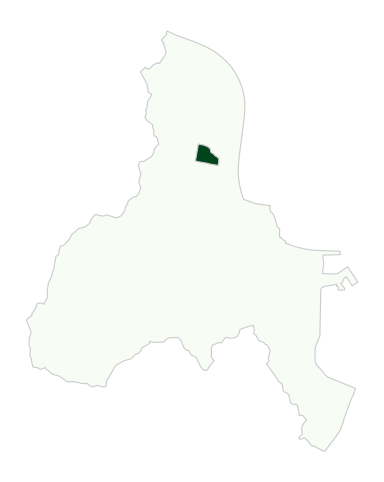

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# gdf와 trash_df를 병합합니다.
# '법정동명'을 기준으로 병합
# 원하는 변수
variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = dungok_filter_gdf[variable].min(), dungok_filter_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
dungok_filter_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/dungok_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()